In [1]:
import os 
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
categories = ['with_mask','without_mask1']
data = []


for category in categories:
    path = os.path.join(r'C:\Users\Lenovo\Desktop\Projects\Projects_Data\ML_project\face_mask_detection\dataset',category)
    label = categories.index(category)
    for file in os.listdir(path):

        img_path = os.path.join(path,file)
        img = cv2.imread(img_path)
        img = cv2.resize(img,(224,224))

        data.append([img,label])
            

In [4]:
len(data)

1917

In [5]:
import random
random.shuffle(data)

In [6]:
x = []
y = []
for features,label in data:
    x.append(features)
    y.append(label)

In [7]:
len(x)

1917

In [8]:
len(y)

1917

In [9]:
x = np.array([img_data[0] for img_data in data])
y = np.array([img_data[1] for img_data in data])

# Buliding a convolutional nenural network(cnn)

In [10]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0,5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0,5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# compile the neural network

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x = x.astype('float32') / 255.0

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [15]:
# training the neural network
history = model.fit(x_train,y_train ,validation_split=0.1,epochs=2)

Epoch 1/2
44/44 ━━━━━━━━━━━━━━━━━━━━ 1008s 21s/step - acc: 0.7346 - loss: 1.9016 - val_acc: 1.0000 - val_loss: 3.2041e-04
Epoch 2/2
44/44 ━━━━━━━━━━━━━━━━━━━━ 1000s 23s/step - acc: 0.9976 - loss: 0.0091 - val_acc: 1.0000 - val_loss: 1.9443e-04


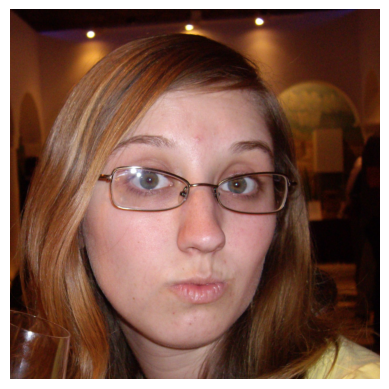

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.08564442 0.99568   ]]
1
without mask


In [16]:
input_image_path = input('path of the image to be predicted:')
input_image = cv2.imread(input_image_path)
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
input_image_resizes = cv2.resize(input_image,(224,224))
input_image_scaled = input_image_resizes.astype('float32') / 255.0
input_image_reshaped = np.reshape(input_image_scaled,[1,224,224,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 0:
    print('with mask')

else:
    print('without mask')